<center><h2>Python Programming</h2></center>
<center><h2>[Data Cleaning and Pre-Processing]</h2></center>

### Import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
from latlon_utils import get_country, get_climate

## Load dataset

In [2]:
df_load = pd.read_csv("carob_fertilizer_cc/carob_fertilizer-cc.csv", delimiter=",", encoding="ISO-8859-1", header=0)

/tmp/ipykernel_89667/1428607120.py:1: DtypeWarning: Columns (1,4,5,6,7,8,10,11,12,15,16,17,21,22,23,24,25,26,28,29,30,31,32,33,34,35,36,40,41,42,43,44,45,46,47,48,49,56,57,58,59,60,61,62,63,64,65,66,67,69,70,73,74,75,76,113,114,115,116,117,118,119,123) have mixed types. Specify dtype option on import or set low_memory=False.
  df_load = pd.read_csv("carob_fertilizer_cc/carob_fertilizer-cc.csv", delimiter=",", encoding="ISO-8859-1", header=0)


In [3]:
df_load.describe()

,record_id,latitude,elevation,transplanting_date,flowering_date,maturity_date,dmy_total,dmy_residue,B_fertilizer,Ca_fertilizer,...,soil_Mn,soil_Fe,soil_Zn,soil_Na,soil_EC,soil_ECEC,soil_color,soil_depth,soil_constraint,soil_ex_acidity
count,4594.000000,97033.000000,13301.000000,0.0,0.0,0.0,8584.000000,258.000000,16783.000000,14007.000000,...,0.0,741.000000,1961.000000,0.0,0.0,0.0,0.0,804.000000,0.0,0.0
mean,2091.655855,2.697843,1075.705097,NaN,NaN,NaN,1530.641870,2354.683042,13.865885,3.266081,...,NaN,20.753266,1.965977,NaN,NaN,NaN,NaN,41.095771,NaN,NaN
std,1310.243538,12.605920,1643.622370,NaN,NaN,NaN,4245.904331,1073.246565,32.502688,13.008340,...,NaN,24.978619,3.868295,NaN,NaN,NaN,NaN,17.729657,NaN,NaN
min,1.000000,-38.148140,-9999.000000,NaN,NaN,NaN,0.000000,114.000000,0.000000,0.000000,...,NaN,0.650000,0.020000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,933.250000,-3.430000,1142.000000,NaN,NaN,NaN,45.180000,1612.126770,0.000000,0.000000,...,NaN,4.600000,0.490000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
50%,2081.500000,5.291220,1388.000000,NaN,NaN,NaN,117.955000,2324.500000,0.000000,0.000000,...,NaN,8.800000,0.900000,NaN,NaN,NaN,NaN,39.500000,NaN,NaN
75%,3229.750000,10.526100,1502.000000,NaN,NaN,NaN,1250.000000,3079.000000,0.000000,0.000000,...,NaN,41.070000,1.900000,NaN,NaN,NaN,NaN,60.000000,NaN,NaN
max,4378.000000,52.214000,2674.699951,NaN,NaN,NaN,80721.000000,5675.481648,150.000000,80.000000,...,NaN,133.000000,27.990000,NaN,NaN,NaN,NaN,80.000000,NaN,NaN


In [4]:
df_load.head()

,dataset_id,trial_id,record_id,country,adm1,adm2,adm3,adm4,adm5,location,...,soil_Mn,soil_Fe,soil_Zn,soil_Na,soil_EC,soil_ECEC,soil_color,soil_depth,soil_constraint,soil_ex_acidity
0,doi_10.18167_DVN1_DLTQWR,1,NaN,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,doi_10.18167_DVN1_DLTQWR,1,NaN,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,doi_10.18167_DVN1_DLTQWR,1,NaN,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,doi_10.18167_DVN1_DLTQWR,1,NaN,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,doi_10.18167_DVN1_DLTQWR,1,NaN,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_load.columns.tolist()

['dataset_id',
 'trial_id',
 'record_id',
 'country',
 'adm1',
 'adm2',
 'adm3',
 'adm4',
 'adm5',
 'location',
 'site',
 'reference',
 'longitude',
 'latitude',
 'elevation',
 'date',
 'planting_date',
 'emergence_date',
 'transplanting_date',
 'flowering_date',
 'maturity_date',
 'harvest_date',
 'season',
 'on_farm',
 'is_survey',
 'treatment',
 'rep',
 'crop',
 'variety',
 'variety_code',
 'variety_type',
 'intercrops',
 'previous_crop',
 'crop_rotation',
 'dmy_roots',
 'dmy_stems',
 'dmy_storage',
 'dmy_total',
 'dmy_residue',
 'yield_part',
 'yield',
 'residue_yield',
 'grain_weight',
 'fertilizer_type',
 'N_fertilizer',
 'N_splits',
 'P_fertilizer',
 'K_fertilizer',
 'Zn_fertilizer',
 'S_fertilizer',
 'B_fertilizer',
 'Ca_fertilizer',
 'Mg_fertilizer',
 'Fe_fertilizer',
 'lime',
 'gypsum',
 'OM_used',
 'OM_type',
 'OM_amount',
 'OM_N',
 'OM_P',
 'OM_K',
 'inoculated',
 'inoculant',
 'irrigated',
 'irrigation_source',
 'irrigation_number',
 'irrigation_amount',
 'irrigation_dates

In [6]:
df_load.shape

(98054, 142)

In [7]:
df_load.shape

(98054, 142)

## Extract data of Nigeria

In [8]:
df_nigeria = df_load.loc[df_load['country'] == "Nigeria"]

In [9]:
df_nigeria.shape

(27366, 142)

In [10]:
df_nigeria['country']

0        Nigeria
1        Nigeria
2        Nigeria
3        Nigeria
4        Nigeria
          ...   
89882    Nigeria
91861    Nigeria
91862    Nigeria
91863    Nigeria
91864    Nigeria
Name: country, Length: 27366, dtype: object

## Exploring Data: Crops grown in Nigeria

In [11]:
df_nigeria['crop']

0        sorghum
1        sorghum
2        sorghum
3        sorghum
4        sorghum
          ...   
89882      maize
91861      maize
91862      maize
91863      maize
91864      maize
Name: crop, Length: 27366, dtype: object

In [12]:
le_crop = LabelEncoder()
le_crop.fit(df_nigeria.crop.str.strip())
encoded_labels_crops = le_crop.transform(df_nigeria.crop.str.strip())
#print(list(le_crop.classes_), "\n" ,np.unique(encoded_labels_crops))

#get unique values and counts of each value
unique_crop, count_crop = np.unique(df_nigeria.crop.to_numpy(), return_counts=True)

In [13]:
#display unique values and counts side by side
print(np.asarray((unique_crop, count_crop, list(le_crop.classes_))).T)

[['cassava' 7831 'cassava']
 ['chili pepper' 1 'chili pepper']
 ['common bean' 20 'common bean']
 ['cotton' 19 'cotton']
 ['cowpea' 1939 'cowpea']
 ['finger millet' 90 'finger millet']
 ['groundnut' 4017 'groundnut']
 ['maize' 6322 'maize']
 ['onion' 1 'onion']
 ['rice' 48 'rice']
 ['sesame' 10 'sesame']
 ['sorghum' 398 'sorghum']
 ['soybean' 6662 'soybean']
 ['tomato' 5 'tomato']
 ['yam' 3 'yam']]


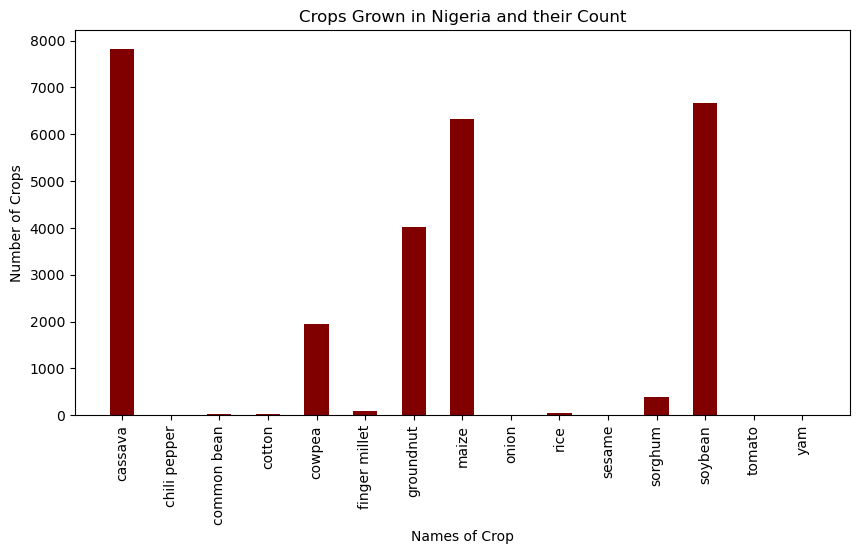

In [14]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(list(le_crop.classes_), count_crop, color ='maroon', width=0.5)
plt.xticks(rotation=90)

plt.xlabel("Names of Crop")
plt.ylabel("Number of Crops")
plt.title("Crops Grown in Nigeria and their Count")
plt.show()

## Exploring Data: Subset maize crop data for Nigeria

In [15]:
#subset maize data only
df_nigeria_maize = df_nigeria.loc[df_nigeria['crop'] == "maize"]

In [16]:
df_nigeria_maize.shape #Quick check to confirm number of records

(6322, 142)

In [17]:
len(list(set(df_nigeria_maize.trial_id))) #check number of trials; one trial contain a replicate of data

986

In [18]:
#df_nigeria_maize.loc[df_nigeria_maize['trial_id'] == "5"] #check data on trial number 5

## Exploring Data: Get each maize trial field geo-positions and map their locations - Nigeria

In [19]:
#df_nigeria_maize.loc[df_nigeria_maize['trial_id'] == "5"] #check data on trial number 5

In [20]:
#for a in range(len(set(df_nigeria_maize['trial_id']))):

df_lat_long = pd.DataFrame()

count = 0 
for a in range(len(df_nigeria_maize['trial_id'].unique())):
    df_trial = df_nigeria_maize.loc[df_nigeria_maize['trial_id'] == df_nigeria_maize['trial_id'].unique()[a]]
    if(len(df_trial['longitude'].values) > 0): #contains values
        #print(df_trial['trial_id'].values[0], " ", df_trial['longitude'].values[0], " ", df_trial['latitude'].values[0])
        df_lat_long = pd.concat([df_lat_long, pd.DataFrame({'longitude': df_trial['longitude'].values[0], 'latitude': df_trial['latitude'].values[0]}, index=[count])])
        count = count + 1

In [21]:
df_lat_long.shape

(985, 2)

In [22]:
#loading Nigeria's shape file
nigeria_admin_map = gpd.read_file('SHP/nigeria2/nga_admbnda_adm2_osgof_20170222.shp') #From world bank - https://datacatalog.worldbank.org/search/dataset/0039368/Nigeria---Administrative-Boundaries

In [23]:
maize_gdf = gpd.GeoDataFrame(df_lat_long, geometry=gpd.points_from_xy(df_lat_long.longitude, df_lat_long.latitude),crs='4326')

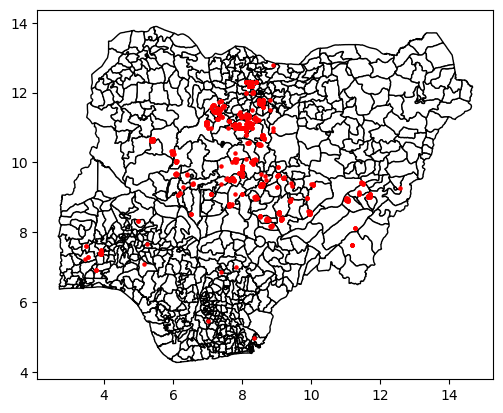

In [24]:
base = nigeria_admin_map.plot(color='white', edgecolor='black') #plotting unique data
maize_gdf.plot(ax=base, marker='o', color='red', markersize=5);

## Exploring Data: Understand variables and data in maize trial records in Nigeria

In [25]:
df_nigeria_maize.shape #Check the shape

(6322, 142)

In [26]:
df_nigeria_maize.describe #Decribe the variables

<bound method NDFrame.describe of                      dataset_id  \
12     doi_10.18167_DVN1_DLTQWR   
13     doi_10.18167_DVN1_DLTQWR   
14     doi_10.18167_DVN1_DLTQWR   
15     doi_10.18167_DVN1_DLTQWR   
16     doi_10.18167_DVN1_DLTQWR   
...                         ...   
89882    doi_10.7910_DVN_UNLRGC   
91861    doi_10.7910_DVN_UNLRGC   
91862    doi_10.7910_DVN_UNLRGC   
91863    doi_10.7910_DVN_UNLRGC   
91864    doi_10.7910_DVN_UNLRGC   

                                                trial_id  record_id  country  \
12                                                     2        NaN  Nigeria   
13                                                     2        NaN  Nigeria   
14                                                     2        NaN  Nigeria   
15                                                     2        NaN  Nigeria   
16                                                     3        NaN  Nigeria   
...                                                  ...        .

In [27]:
df_nigeria_maize.loc[df_nigeria_maize['trial_id'] == "5"] #check data on trial number 5

,dataset_id,trial_id,record_id,country,adm1,adm2,adm3,adm4,adm5,location,...,soil_Mn,soil_Fe,soil_Zn,soil_Na,soil_EC,soil_ECEC,soil_color,soil_depth,soil_constraint,soil_ex_acidity
45384,doi_10.25502_pakr-y904_d,5,NaN,Nigeria,Plateau,Kanam,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45385,doi_10.25502_pakr-y904_d,5,NaN,Nigeria,Plateau,Kanam,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45386,doi_10.25502_pakr-y904_d,5,NaN,Nigeria,Plateau,Kanam,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45387,doi_10.25502_pakr-y904_d,5,NaN,Nigeria,Plateau,Kanam,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Feature Selection: Select relevant variables that inform yield prediction

In [28]:
Feature_Selection = df_nigeria_maize[["longitude", "latitude","planting_date","harvest_date","variety","dmy_total","grain_weight","fertilizer_type","N_fertilizer","P_fertilizer","K_fertilizer","harvest_days","grain_weight","yield"]]
Feature_Selection

,longitude,latitude,planting_date,harvest_date,variety,dmy_total,grain_weight,fertilizer_type,N_fertilizer,P_fertilizer,K_fertilizer,harvest_days,grain_weight,yield
12,3.9,7.40,1975,NaN,NaN,NaN,NaN,unknown,120,35,0.0,NaN,NaN,3000
13,3.9,7.40,1976,NaN,NaN,NaN,NaN,unknown,120,35,0.0,NaN,NaN,2980
14,3.9,7.40,1977,NaN,NaN,NaN,NaN,unknown,120,35,0.0,NaN,NaN,2970
15,3.9,7.40,1978,NaN,NaN,NaN,NaN,unknown,120,35,0.0,NaN,NaN,2900
16,7.833333,7.00,1982,NaN,NaN,NaN,NaN,unknown,0,0,0.0,NaN,NaN,2430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89882,8.56,9.67,1978,NaN,NaN,NaN,NaN,NaN,66,33.44,37.3545,NaN,NaN,1800
91861,9.45,9.33,1978,NaN,NaN,NaN,NaN,NaN,0,0,0.0,NaN,NaN,1000.0
91862,9.45,9.33,1978,NaN,NaN,NaN,NaN,NaN,66,0,37.3545,NaN,NaN,500.0
91863,9.45,9.33,1978,NaN,NaN,NaN,NaN,NaN,66,16.72,37.3545,NaN,NaN,1500.0


In [29]:
Feature_Selection.isnull().sum()

longitude             0
latitude              0
planting_date      2732
harvest_date       3156
variety            1202
dmy_total          6106
grain_weight       6106
fertilizer_type    5097
N_fertilizer         28
P_fertilizer        257
K_fertilizer         88
harvest_days       6106
grain_weight       6106
yield               122
dtype: int64

### Select fewer features since most of the previous variables are empty

In [30]:
Feature_Selection2 = df_nigeria_maize[["longitude", "latitude","planting_date","variety","N_fertilizer","P_fertilizer","K_fertilizer","yield"]]
Feature_Selection2.isnull().sum()

longitude           0
latitude            0
planting_date    2732
variety          1202
N_fertilizer       28
P_fertilizer      257
K_fertilizer       88
yield             122
dtype: int64

## Delete rows containing empty/null values

In [31]:
Feature_Selection3 = Feature_Selection2.dropna()

In [32]:
Feature_Selection3.isnull().sum()

longitude        0
latitude         0
planting_date    0
variety          0
N_fertilizer     0
P_fertilizer     0
K_fertilizer     0
yield            0
dtype: int64

In [33]:
Feature_Selection3.shape

(2327, 8)

This is WorldClim version 2.1 climate data for 1970-2000. This version was released in January 2020.

In [34]:
max(Feature_Selection3.planting_date)

'2017-06-01'

In [35]:
min(Feature_Selection3.planting_date)

'1982-04'

In [36]:
Feature_Selection3.describe()

,latitude
count,2327.000000
mean,10.064116
std,1.029982
min,7.300000
25%,9.338104
50%,10.268580
75%,10.622828
max,12.563083


## Confirm if Points are in Nigeria; commented out since it takes a lot of time to process

In [37]:
len(Feature_Selection3)

2327

In [38]:
Feature_Selection3.iloc[0].longitude

7.78896

In [39]:
#countries = {}

#for a in range(len(Feature_Selection3)):
#    country = get_country(Feature_Selection3.iloc[a].latitude, Feature_Selection3.iloc[a].longitude)
#    countries[a] = country
#    #break;

In [40]:
#for key, val in countries.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
#    if(val != "Nigeria"):
#        print("This row needs to be deleted", key, " it has country", val)

In [41]:
#count = 0 
#for a in range(len(df_nigeria_maize['trial_id'].unique())):
#    df_trial = df_nigeria_maize.loc[df_nigeria_maize['trial_id'] == df_nigeria_maize['trial_id'].unique()[a]]
#    if(len(df_trial['longitude'].values) > 0): #contains values
#        #print(df_trial['trial_id'].values[0], " ", df_trial['longitude'].values[0], " ", df_trial['latitude'].values[0])
#        df_lat_long = pd.concat([df_lat_long, pd.DataFrame({'longitude': df_trial['longitude'].values[0], 'latitude': df_trial['latitude'].values[0]}, index=[count])])
#        count = count + 1

In [42]:
Feature_Selection3.head()

,longitude,latitude,planting_date,variety,N_fertilizer,P_fertilizer,K_fertilizer,yield
3416,7.78896,10.26858,2015,COMP1,DAP,SSP,0.0,458.4
3417,7.78896,10.26858,2015,COMP1,DAP,SSP,0.0,1197.68
3418,7.78896,10.26858,2015,COMP1,DAP,SSP,0.0,1248.24
3419,7.78896,10.26858,2015,COMP1,DAP,SSP,60.0,2854.53
3420,7.78896,10.26858,2015,COMP1,DAP,SSP,60.0,2649.84


### Check again of there are null values

In [43]:
Feature_Selection3.isnull().sum()

longitude        0
latitude         0
planting_date    0
variety          0
N_fertilizer     0
P_fertilizer     0
K_fertilizer     0
yield            0
dtype: int64

## Cleaning date values

In [44]:
max(Feature_Selection3.planting_date)

'2017-06-01'

In [45]:
min(Feature_Selection3.planting_date)

'1982-04'

In [46]:
years = np.zeros(len(Feature_Selection3.planting_date))

for a in range(len(Feature_Selection3.planting_date)):
    years[a] = pd.to_datetime(Feature_Selection3.planting_date.iloc[a]).year

In [47]:
Feature_Selection3['planting_year'] = years.tolist()

/tmp/ipykernel_89667/1804558356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Feature_Selection3['planting_year'] = years.tolist()


In [48]:
Feature_Selection3.head()

,longitude,latitude,planting_date,variety,N_fertilizer,P_fertilizer,K_fertilizer,yield,planting_year
3416,7.78896,10.26858,2015,COMP1,DAP,SSP,0.0,458.4,2015.0
3417,7.78896,10.26858,2015,COMP1,DAP,SSP,0.0,1197.68,2015.0
3418,7.78896,10.26858,2015,COMP1,DAP,SSP,0.0,1248.24,2015.0
3419,7.78896,10.26858,2015,COMP1,DAP,SSP,60.0,2854.53,2015.0
3420,7.78896,10.26858,2015,COMP1,DAP,SSP,60.0,2649.84,2015.0


In [49]:
Feature_Selection3.drop('planting_date', axis=1, inplace = True)

/tmp/ipykernel_89667/2261654500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Feature_Selection3.drop('planting_date', axis=1, inplace = True)


In [50]:
Feature_Selection3.head()

,longitude,latitude,variety,N_fertilizer,P_fertilizer,K_fertilizer,yield,planting_year
3416,7.78896,10.26858,COMP1,DAP,SSP,0.0,458.4,2015.0
3417,7.78896,10.26858,COMP1,DAP,SSP,0.0,1197.68,2015.0
3418,7.78896,10.26858,COMP1,DAP,SSP,0.0,1248.24,2015.0
3419,7.78896,10.26858,COMP1,DAP,SSP,60.0,2854.53,2015.0
3420,7.78896,10.26858,COMP1,DAP,SSP,60.0,2649.84,2015.0


In [51]:
Feature_Selection3 = Feature_Selection3.loc[:,['longitude','latitude','planting_year','variety','N_fertilizer','P_fertilizer','K_fertilizer','yield']]

In [52]:
Feature_Selection3.shape

(2327, 8)

In [53]:
Feature_Selection3.dropna().head()

,longitude,latitude,planting_year,variety,N_fertilizer,P_fertilizer,K_fertilizer,yield
3416,7.78896,10.26858,2015.0,COMP1,DAP,SSP,0.0,458.4
3417,7.78896,10.26858,2015.0,COMP1,DAP,SSP,0.0,1197.68
3418,7.78896,10.26858,2015.0,COMP1,DAP,SSP,0.0,1248.24
3419,7.78896,10.26858,2015.0,COMP1,DAP,SSP,60.0,2854.53
3420,7.78896,10.26858,2015.0,COMP1,DAP,SSP,60.0,2649.84


In [54]:
Feature_Selection3.shape

(2327, 8)

## Concatenate data with weather variables

In [55]:
#Load weather data
weather = pd.read_csv("weather_data.csv", delimiter=",", encoding="ISO-8859-1", header=0)

In [56]:
weather.shape

(2327, 6)

In [57]:
weather.head()

,id,longitude,latitude,planting_year,Avg_Annual_Rainfall,Avg_Annual_Temp
0,3416,7.78896,10.26858,2015,2158,25.33
1,3417,7.78896,10.26858,2015,2158,25.33
2,3418,7.78896,10.26858,2015,2158,25.33
3,3419,7.78896,10.26858,2015,2158,25.33
4,3420,7.78896,10.26858,2015,2158,25.33


In [58]:
Feature_Selection3.shape

(2327, 8)

In [59]:
Feature_Selection3.head()

,longitude,latitude,planting_year,variety,N_fertilizer,P_fertilizer,K_fertilizer,yield
3416,7.78896,10.26858,2015.0,COMP1,DAP,SSP,0.0,458.4
3417,7.78896,10.26858,2015.0,COMP1,DAP,SSP,0.0,1197.68
3418,7.78896,10.26858,2015.0,COMP1,DAP,SSP,0.0,1248.24
3419,7.78896,10.26858,2015.0,COMP1,DAP,SSP,60.0,2854.53
3420,7.78896,10.26858,2015.0,COMP1,DAP,SSP,60.0,2649.84


The have similar IDs and row. They will therefore be concatenatd

In [60]:
Feature_Selection3['Avg_Annual_Rainfall'] = weather['Avg_Annual_Rainfall'].values.tolist()
Feature_Selection3['Avg_Annual_Temp'] = weather['Avg_Annual_Temp'].values.tolist()

In [61]:
#Feature_Selection3.head()

In [62]:
#Re-organize columns
Feature_Selection3 = Feature_Selection3.loc[:,['longitude','latitude','planting_year','variety','N_fertilizer','P_fertilizer','K_fertilizer','Avg_Annual_Rainfall','Avg_Annual_Temp','yield']]

In [63]:
Feature_Selection3.head()

,longitude,latitude,planting_year,variety,N_fertilizer,P_fertilizer,K_fertilizer,Avg_Annual_Rainfall,Avg_Annual_Temp,yield
3416,7.78896,10.26858,2015.0,COMP1,DAP,SSP,0.0,2158,25.33,458.4
3417,7.78896,10.26858,2015.0,COMP1,DAP,SSP,0.0,2158,25.33,1197.68
3418,7.78896,10.26858,2015.0,COMP1,DAP,SSP,0.0,2158,25.33,1248.24
3419,7.78896,10.26858,2015.0,COMP1,DAP,SSP,60.0,2158,25.33,2854.53
3420,7.78896,10.26858,2015.0,COMP1,DAP,SSP,60.0,2158,25.33,2649.84


### Randomize and save the data for further analytics and machine learning modeling

In [64]:
Feature_Selection3 = Feature_Selection3.sample(frac = 1) #Randomize
Feature_Selection3.to_csv("data_features_selected.csv") #Save to CSV

In [65]:
Feature_Selection3.head()

,longitude,latitude,planting_year,variety,N_fertilizer,P_fertilizer,K_fertilizer,Avg_Annual_Rainfall,Avg_Annual_Temp,yield
48108,7.435986,10.518290,2017.0,Sammaz 15,11.0,9.170306,18.255746,1242,26.29,1732.0
46026,8.551623,9.391552,2017.0,Sammaz 15,62.5,13.755459,27.38362,1430,26.30,6185.0
3547,7.78896,10.268580,2015.0,COMP1,DAP,SSP,0.0,2158,25.33,804.75
46462,9.958856,8.536641,2017.0,Sammaz 15,67.0,20.305677,0.0,1197,28.27,3043.0
3506,7.78896,10.268580,2016.0,IWD,DAP,SSP,60.0,2892,25.78,2717.87
